In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os
import dataframe_image as dfi

# #datafiles
# shelter_data_to_load = os.path.join("Resources", "adoption_data.csv")
# population_data_to_load = os.path.join("Resources", "2020_population_data.csv")

# # Read shelter data and store into Pandas DataFrame
# shelter_data = pd.read_csv(shelter_data_to_load)
# pop_data = pd.read_csv(population_data_to_load)
# shelter_data_complete = pd.merge(shelter_data, pop_data, how="right", on=["State", "State"])

#new merged datafile
main_df_path = os.path.join("Resources", "shelter_data_complete.csv")
main_df = pd.read_csv(main_df_path)

main_df.head()

,State,Year,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,...,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine,Population
0,AL,2019,5006,7199,811,16,467,7582,140,744,...,9484,2895,15,5927,1,310,27,111,3094,5024279
1,AL,2020,3495,6803,527,19,525,6816,140,747,...,7480,2303,16,6483,5,253,21,63,2054,5024279
2,AL,2021,3282,7481,683,7,995,7181,147,1180,...,7681,2584,0,6118,90,260,13,37,2099,5024279
3,AK,2019,850,1786,32,67,68,1689,353,0,...,0,0,0,0,0,0,0,0,0,733391
4,AK,2020,800,1404,61,51,68,1755,331,0,...,0,0,0,0,0,0,0,0,0,733391


In [2]:
#group by year
yearly_totals = main_df.groupby("Year").sum()
yearly_totals

,Intake - Relinquished By Owner Total-Feline,Intake - Stray At Large Total-Feline,Intake - Transferred In Total-Feline,Intake - Owner Intended Euthanasia Total-Feline,Intakes - Other Intakes Total-Feline,Live Outcome - Adoption Total-Feline,Live Outcome - Returned To Owner Total-Feline,Live Outcome - Returned To Field Total-Feline,Live Outcome - Transferred Out Total-Feline,Live outcome - Other Live Outcome Total-Feline,...,Live Outcome - Adoption Total-Canine,Live Outcome - Returned To Owner Total-Canine,Live Outcome - Returned To Field Total-Canine,Live Outcome - Transferred Out Total-Canine,Live outcome - Other Live Outcome Total-Canine,Other Outcome - Died In Care Total-Canine,Other Outcome - Lost In Care Total-Canine,Other Outcome - Owner Intended Euthanasia Total-Canine,Other Outcome - Shelter Euthanasia Total-Canine,Population
Year,,,,,,,,,,,,,,,,,,,,,
2019,299209,632397,174757,18754,90361,731828,32494,81016,127693,22762,...,649070,229551,1396,205843,11326,9779,1548,33486,92028,334735155
2020,242015,486427,177671,12849,69816,650855,27046,65022,121225,16914,...,508618,167125,828,179574,11983,7025,1062,25856,49976,334735155
2021,266553,533845,172464,12689,78840,683916,28971,74855,108691,21085,...,510928,178130,414,160034,12141,7845,919,24959,55486,334735155


In [3]:
#combine intakes and outcomes by type for both feline and canine

intake_totals = pd.DataFrame({
    "Relinquished By Owner": yearly_totals["Intake - Relinquished By Owner Total-Feline"] + yearly_totals["Intake - Relinquished By Owner Total-Canine"],
    "Stray": yearly_totals["Intake - Stray At Large Total-Feline"] + yearly_totals["Intake - Stray At Large Total-Canine"],
    "Transfer In": yearly_totals["Intake - Transferred In Total-Feline"] + yearly_totals["Intake - Transferred In Total-Canine"],
    "Owner Intended Euthanasia": yearly_totals["Intake - Owner Intended Euthanasia Total-Feline"] + yearly_totals["Intake - Owner Intended Euthanasia Total-Canine"],
    "Other": yearly_totals["Intakes - Other Intakes Total-Feline"] + yearly_totals["Intakes - Other Intakes Total-Canine"]
})


#save as image
dfi.export(intake_totals, f"Images/intakes_table.png") 

intake_totals


,Relinquished By Owner,Stray,Transfer In,Owner Intended Euthanasia,Other
Year,,,,,
2019,600427,1196734,414140,55140,184479
2020,457405,885350,387474,41406,146806
2021,501527,960927,369066,40031,164114


In [4]:
outcome_totals = pd.DataFrame({
    "Adoption": yearly_totals["Live Outcome - Adoption Total-Feline"] + yearly_totals["Live Outcome - Adoption Total-Canine"],
    "Returned To Owner": yearly_totals["Live Outcome - Returned To Owner Total-Feline"] + yearly_totals["Live Outcome - Returned To Owner Total-Canine"],
    "Returned To Field": yearly_totals["Live Outcome - Returned To Field Total-Feline"] + yearly_totals["Live Outcome - Returned To Field Total-Canine"],
    "Transferred Out": yearly_totals["Live Outcome - Transferred Out Total-Feline"] + yearly_totals["Live Outcome - Transferred Out Total-Canine"],
    "Other Live Outcomes": yearly_totals["Live outcome - Other Live Outcome Total-Feline"] + yearly_totals["Live outcome - Other Live Outcome Total-Canine"],
    "Died In Care": yearly_totals["Other Outcome - Died In Care Total-Feline"] + yearly_totals["Other Outcome - Died In Care Total-Canine"],
    "Lost In Care": yearly_totals["Other Outcome - Lost In Care Total-Feline"] + yearly_totals["Other Outcome - Lost In Care Total-Canine"],
    "Owner Intended Euthanasia": yearly_totals["Other Outcome - Owner Intended Euthanasia Total-Feline"] + yearly_totals["Other Outcome - Owner Intended Euthanasia Total-Canine"],
    "Shelter Euthanasia": yearly_totals["Other Outcome - Shelter Euthanasia Total-Feline"] + yearly_totals["Other Outcome - Shelter Euthanasia Total-Canine"]
})

#save as image
dfi.export(outcome_totals, f"Images/outcomes_table.png") 

outcome_totals

,Adoption,Returned To Owner,Returned To Field,Transferred Out,Other Live Outcomes,Died In Care,Lost In Care,Owner Intended Euthanasia,Shelter Euthanasia
Year,,,,,,,,,
2019,1380898,262045,82412,333536,34088,45727,4985,50049,250279
2020,1159473,194171,65850,300799,28897,31687,3276,37090,129455
2021,1194844,207101,75269,268725,33226,38035,2477,35830,139366


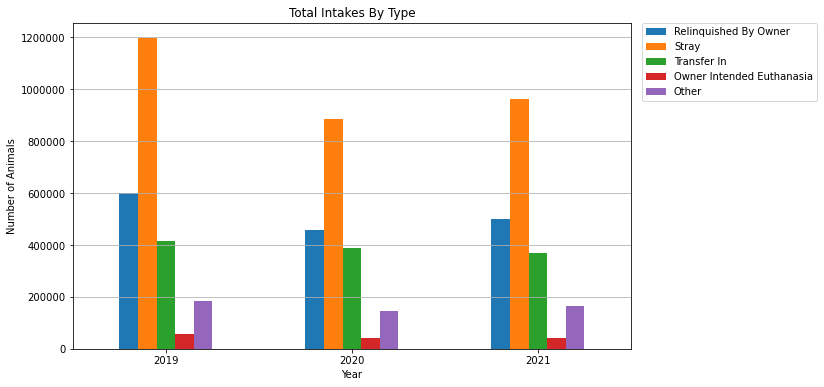

In [5]:
#create graphs for total intakes and total outcomes by category type
#intake plot
plt.rcParams["figure.figsize"] = (10, 6)
intake_totals.plot(kind ="bar", title="Total Intakes By Type", rot = 0, use_index=True).grid(axis="y")
plt.ticklabel_format(style="plain", axis ="y")
plt.ylabel("Number of Animals")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

#save figure
plt.savefig(f"images/Figure_1")

plt.show()

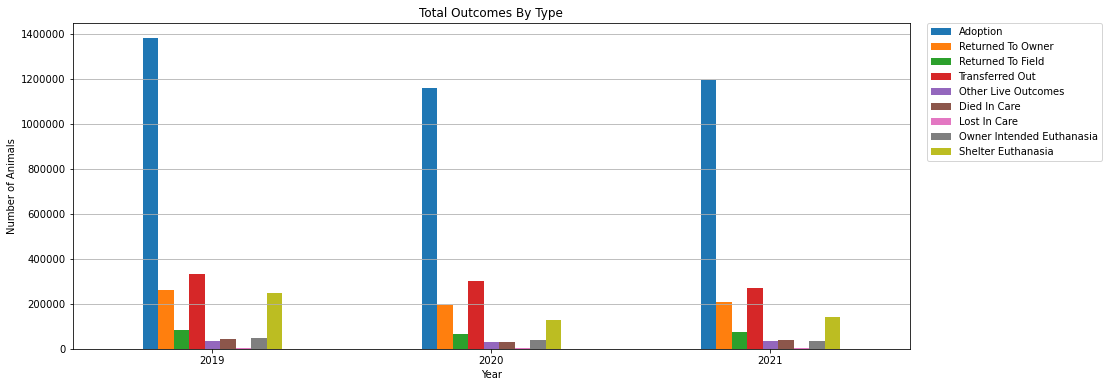

In [6]:
#outcome plot
plt.rcParams["figure.figsize"] = (15, 6)
outcome_totals.plot(kind="bar", title="Total Outcomes By Type", rot = 0, use_index=True).grid(axis="y")
plt.ticklabel_format(style="plain", axis ="y")
plt.ylabel("Number of Animals")
plt.legend(bbox_to_anchor=(1.02, 1), loc="upper left", borderaxespad=0)

#save figure
plt.savefig(f"images/Figure_2")

plt.show()

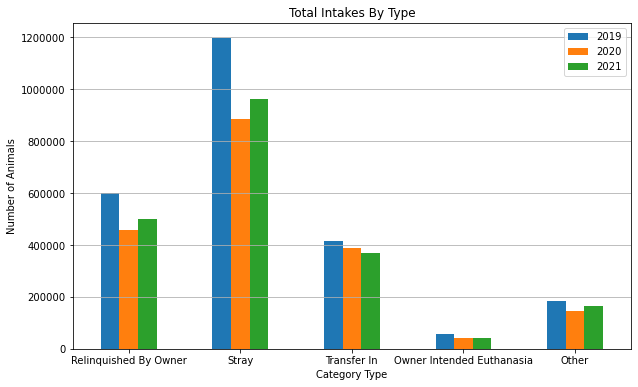

In [7]:
#pivot plots so years become columns
#intakes by year
plt.rcParams["figure.figsize"] = (10, 6)
intake_totals.T.plot(kind="bar", title="Total Intakes By Type", rot = 0, use_index=True).grid(axis="y")
plt.suptitle
plt.ticklabel_format(style='plain', axis ="y")
plt.ylabel("Number of Animals")
plt.xlabel("Category Type")
plt.legend()

#save figure
plt.savefig(f"images/Figure_3")

plt.show()

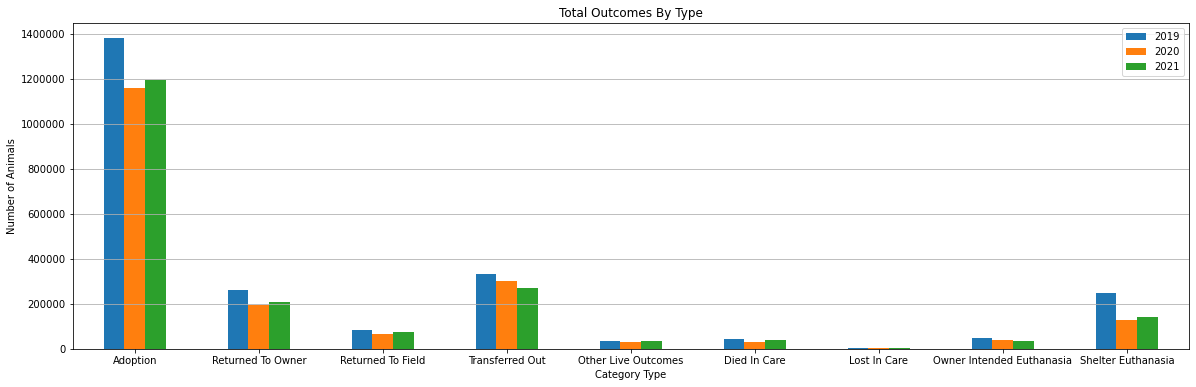

In [8]:
#outcomes by year
plt.rcParams["figure.figsize"] = (20, 6)
outcome_totals.T.plot(kind="bar", title="Total Outcomes By Type", rot = 0, use_index=True).grid(axis="y")
plt.ticklabel_format(style='plain', axis ="y")
plt.ylabel("Number of Animals")
plt.xlabel("Category Type")
plt.legend()

#save figure
plt.savefig(f"images/Figure_4")

plt.show()

In [9]:
#combine overall intake vs outcome
totals = pd.DataFrame({
    "Total Intakes": intake_totals.sum(axis=1),
    "Total Outcomes": outcome_totals.sum(axis=1)
})

#save as image and pivot table
dfi.export(totals.T, f"Images/totals_table.png") 

totals

,Total Intakes,Total Outcomes
Year,,
2019,2450920,2444019
2020,1918441,1950698
2021,2035665,1994873


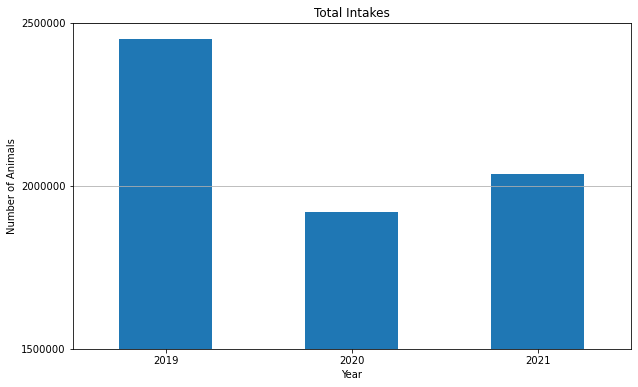

In [10]:
#Total Intake Plot
plt.rcParams["figure.figsize"] = (10, 6)
totals["Total Intakes"].plot(kind="bar", title="Total Intakes", rot = 0).grid(axis="y")
plt.ylim([1500000,2500000])
plt.yticks([1500000, 2000000, 2500000])
plt.ticklabel_format(style='plain', axis ="y")
plt.ylabel("Number of Animals")

#save figure
plt.savefig(f"images/Figure_5")

plt.show()

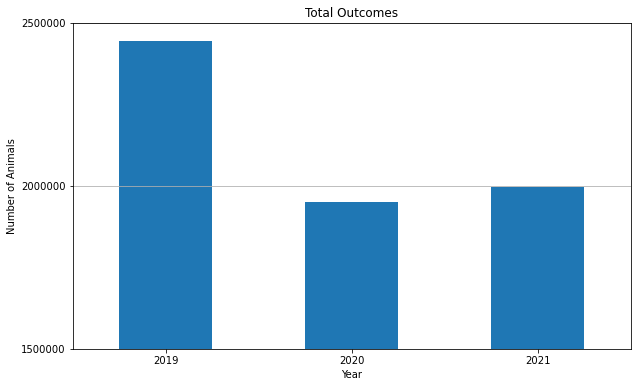

In [11]:
#Total Outcomes Plot
plt.rcParams["figure.figsize"] = (10, 6)
totals["Total Outcomes"].plot(kind="bar", title="Total Outcomes", rot = 0).grid(axis="y")
plt.ylim([1500000,2500000])
plt.yticks([1500000, 2000000, 2500000])
plt.ticklabel_format(style='plain', axis ="y")
plt.ylabel("Number of Animals")

#save figure
plt.savefig(f"images/Figure_6")

plt.show()

In [12]:
#calculations

#change in total intakes between the years
intakes_19 = totals["Total Intakes"].iloc[0]
intakes_20 = totals["Total Intakes"].iloc[1]
intakes_21 = totals["Total Intakes"].iloc[2]

intake_change1 = ((intakes_20 - intakes_19)/ intakes_19 *100).round(2)
intake_change2 = ((intakes_21 - intakes_20)/ intakes_20 *100).round(2)
intake_change_overall = ((intakes_21 - intakes_19)/ intakes_19 *100).round(2)

#print statements
print(f"The total number of animal intakes changed by {intake_change1}% from 2019 to 2020 and {intake_change2}% from 2020 to 2021. The overall change from 2019 to 2021 was {intake_change_overall}%")

The total number of animal intakes changed by -21.73% from 2019 to 2020 and 6.11% from 2020 to 2021. The overall change from 2019 to 2021 was -16.94%


In [13]:
#change in total outcomes between the years
outcomes_19 = totals["Total Outcomes"].iloc[0]
outcomes_20 = totals["Total Outcomes"].iloc[1]
outcomes_21 = totals["Total Outcomes"].iloc[2]

outcome_change1 = ((outcomes_20 - outcomes_19)/ outcomes_19 *100).round(2)
outcome_change2 = ((outcomes_21 - outcomes_20)/ outcomes_20 *100).round(2)
outcome_change_overall = ((outcomes_21 - outcomes_19)/ outcomes_19 *100).round(2)

#print statements
print(f"The total number of animal outcomes changed by {outcome_change1}% from 2019 to 2020 and {outcome_change2}% from 2020 to 2021. The overall change from 2019 to 2021 was {outcome_change_overall}%")

The total number of animal outcomes changed by -20.18% from 2019 to 2020 and 2.26% from 2020 to 2021. The overall change from 2019 to 2021 was -18.38%
